# Rekognition API Example

This is a simple code set to try out calling Rekognition through API calls.
Image face detection and face characterization calls will be made on images stored in an S3 Bucket

### Prerequisites
This code requires an Amazon account, with a user having CLI access privileges.
Before running this, I created an S3 bucket and uploaded some test images through the web interface.  It is possible to upload images using the API but for now I will start with images in a bucket.

Also, I installed the Rekognition SDK through the AWS Rekognition website.
Install boto3 interface:
    pip install boto3


20150606_195835.jpg
20160220_110653.jpg
20160712_172748.jpg
E Angry.jpg
Family.jpg


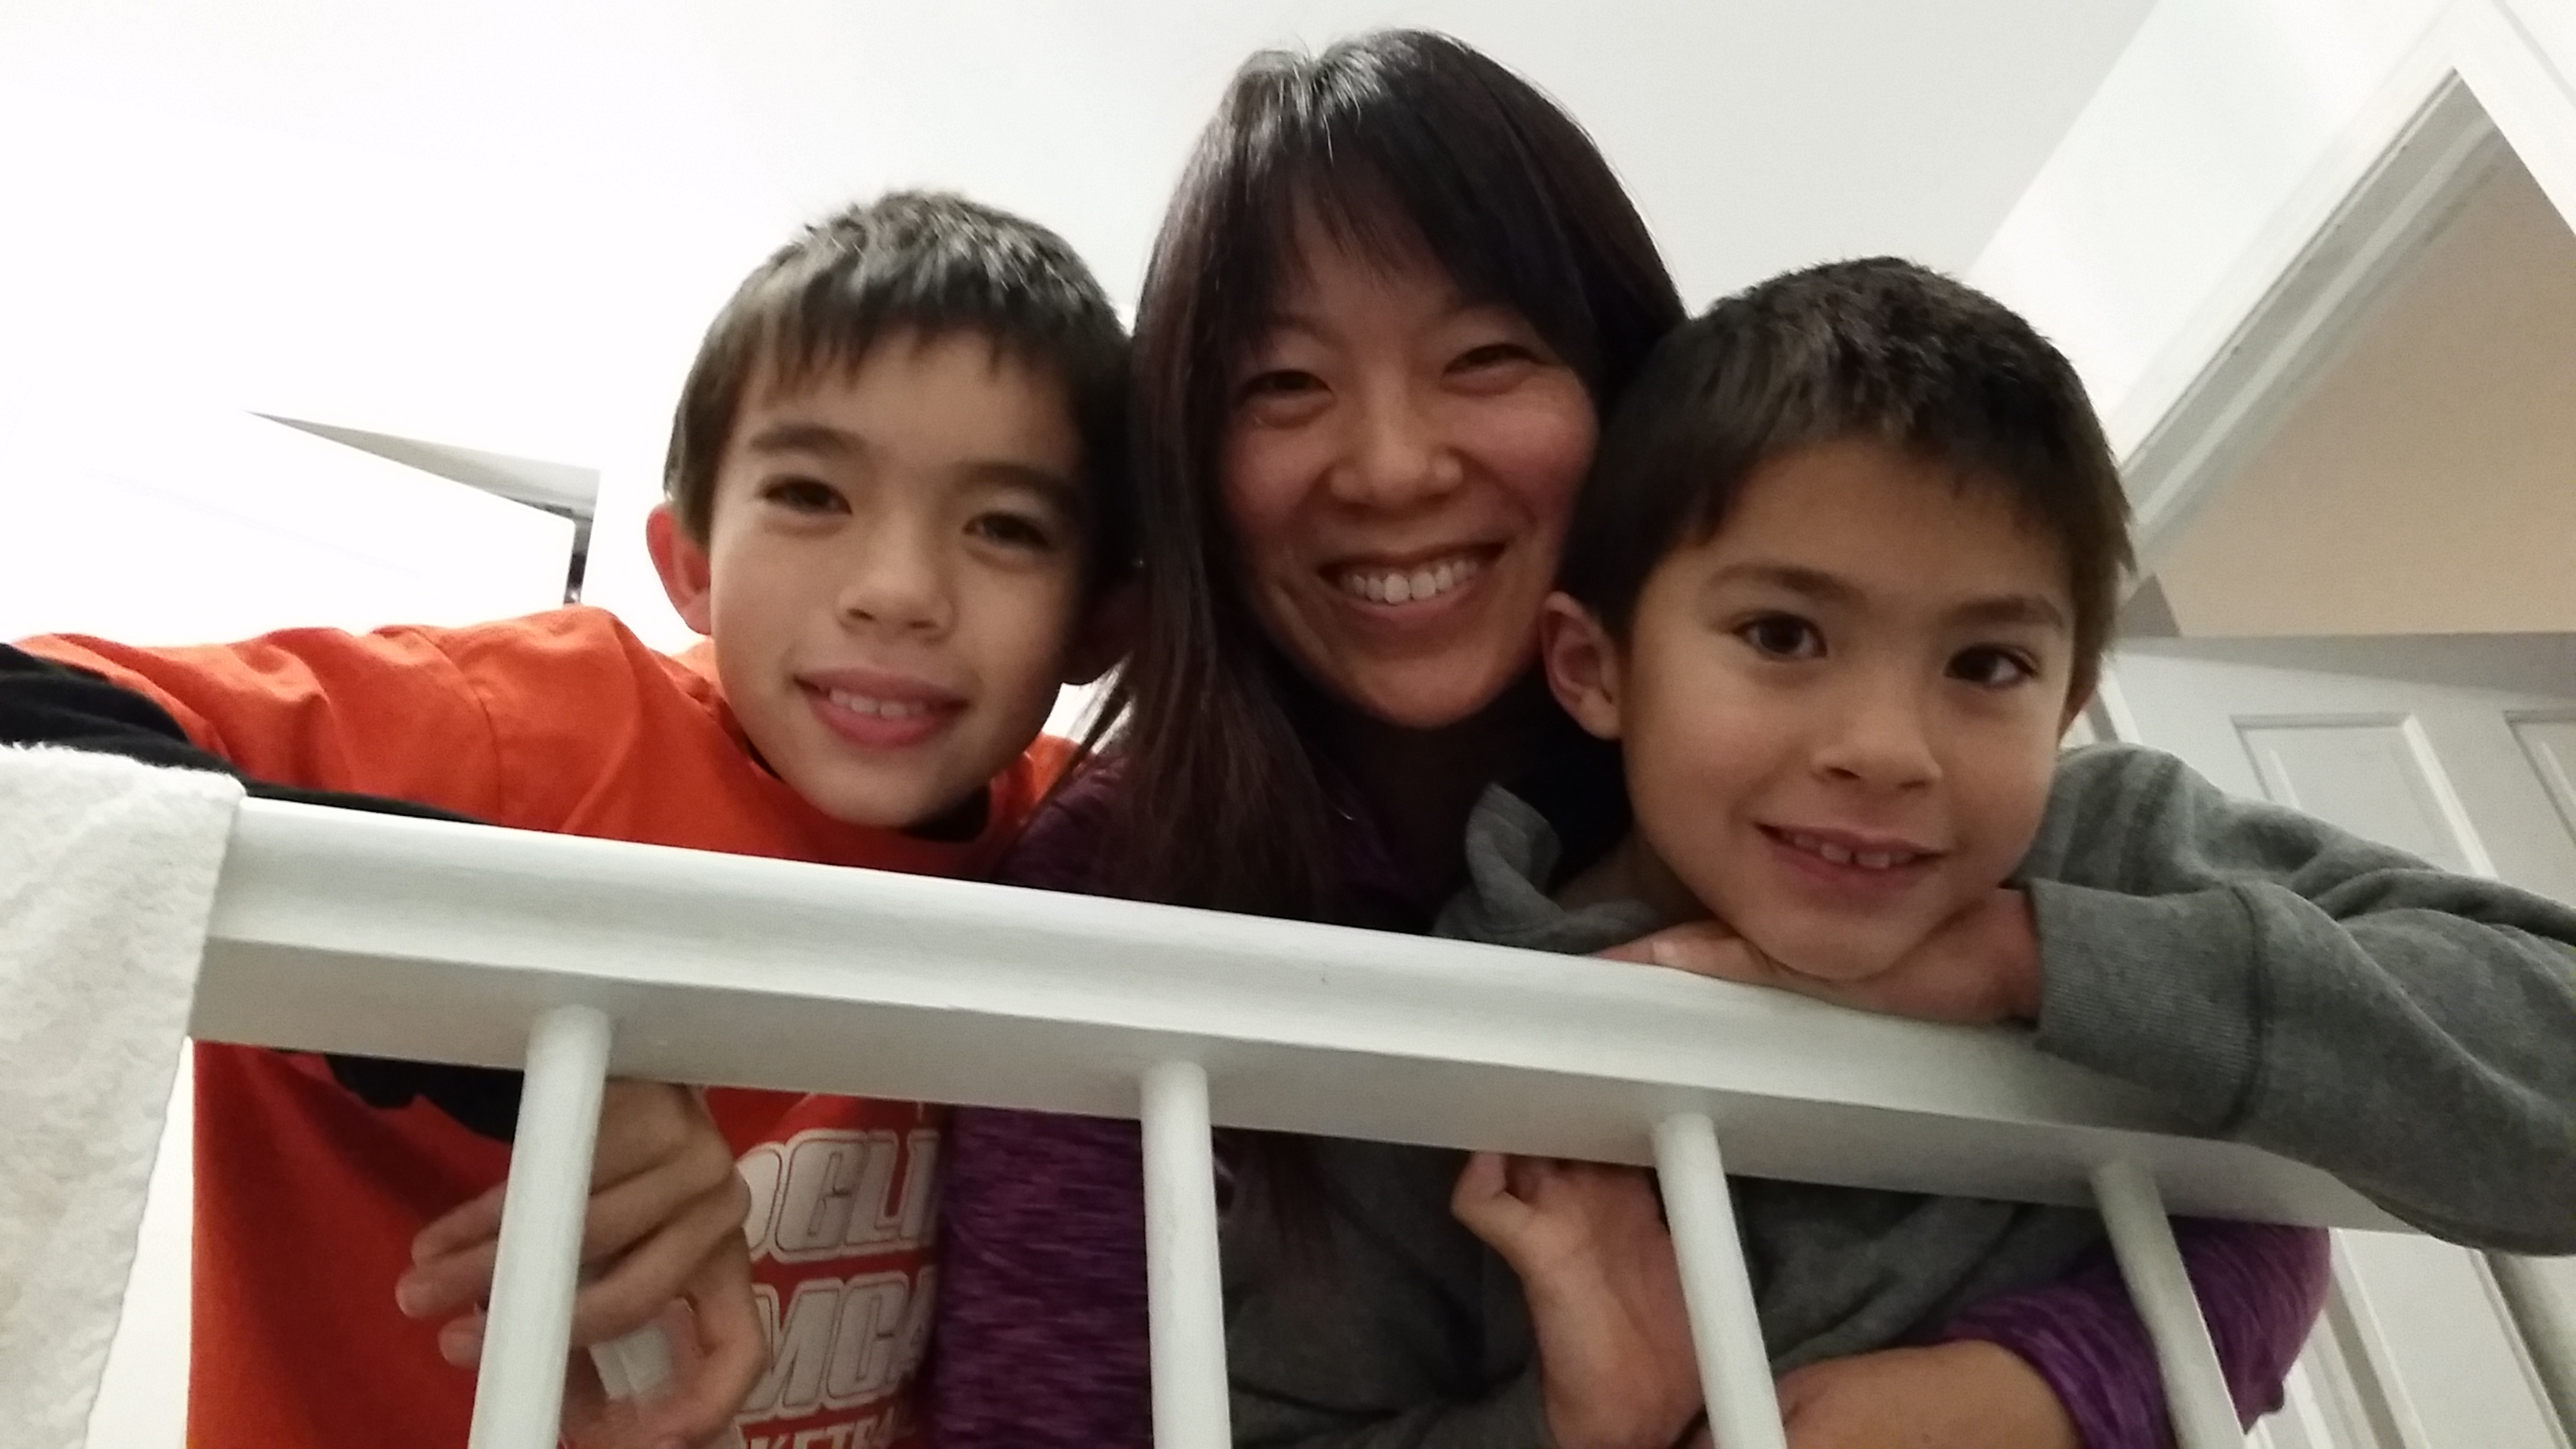

In [5]:
import boto3
import json
from PIL import Image

s3 = boto3.resource('s3')

bucket = s3.Bucket('btieskoetter-test-images-1')
for obj in bucket.objects.all():
    print(obj.key)
    
#bucket.download_file('Family.jpg', 'Family.jpg')
picture = Image.open('Family.jpg')
display(picture)

In [10]:


photo = 'E Angry.jpg'
photo2 = 'Family.jpg'
bucket = 'btieskoetter-test-images-1'

client = boto3.client('rekognition')

response = client.detect_faces(Image={'S3Object':{'Bucket':bucket,'Name':photo2}},Attributes=['ALL'])

print('Detected ' + str(len(response) + 1) + ' faces for ' + photo2)    
for faceDetail in response['FaceDetails']:
    print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) 
         + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
    print('Rekognition is ' + str(faceDetail['Gender']['Confidence']) +'% confident the face is ' + 
         faceDetail['Gender']['Value'])
    print()

Detected 3 faces for Family.jpg
The detected face is between 5 and 15 years old
Rekognition is 90.41411590576172% confident the face is Female

The detected face is between 13 and 25 years old
Rekognition is 98.92328643798828% confident the face is Female

The detected face is between 2 and 8 years old
Rekognition is 88.27494049072266% confident the face is Male

